In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller #проверяет стационарность ряда
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
#Тест на стационарность 
def test_stationarity(timeseries):#передаем временной ряд (массив)
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')# autolag коэффициент при каких значениях наиболее правдоподобные результаты
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    #в результате получаем значения статисики, пи велью, какой лаг (какой сдвиг делать) и кол-во наблюдений
    for [key, value] in dftest[4].items(): # перебираем критичные значени
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
#Визуализация автокорреляции и частичной автокорреляции
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)#тест на стационарность ряда
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
#параметры графика
        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)#автокорреляция
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)#частичная

        plt.tight_layout()
    return

In [21]:
series2 = pd.read_csv('/Users/dubrov_arseniy/Desktop/Нетология/Data Scientist/Time series/1. Знакомство с временными рядами/1/Series/international-airline-passengers.csv')
series2

,Month,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [13]:
series = pd.read_csv('/Users/dubrov_arseniy/Desktop/Нетология/Data Scientist/Time series/1. Знакомство с временными рядами/1/Series/international-airline-passengers.csv')['Count']
series

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Count, Length: 144, dtype: int64

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


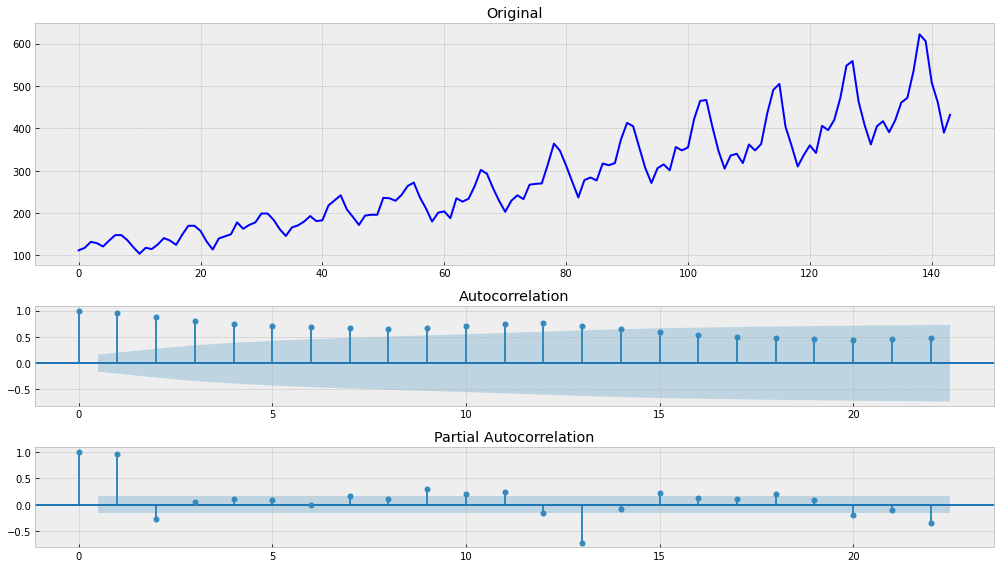

In [14]:
tsplot(series)

#пи велью почти 1. Это значит, что ряд нестационарный; 
#Автокорреляция высокая на разных уровнях (палочки с кружками)

Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [15]:
#Применим преобразование Бокса-Кокса
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


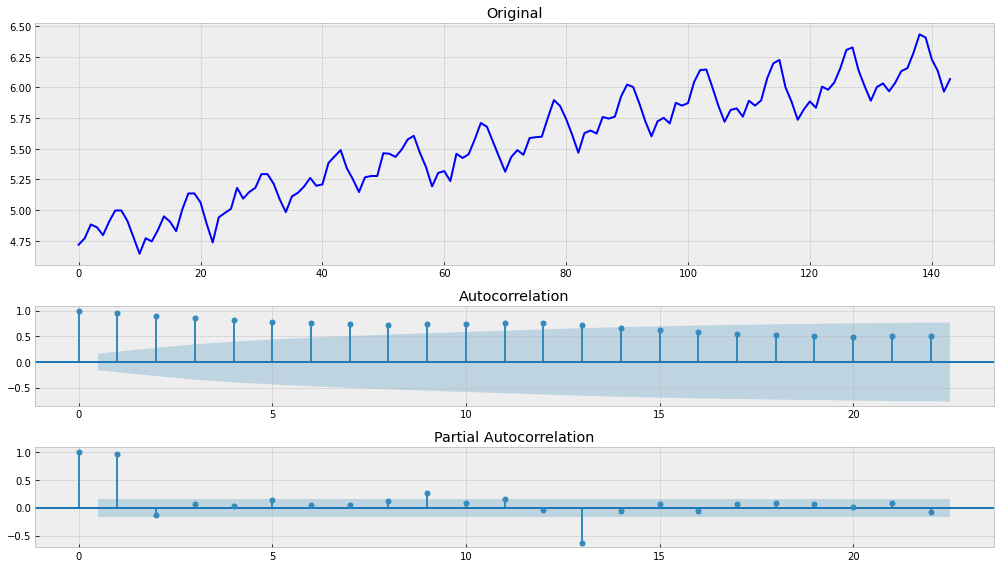

In [16]:
tsplot(series)
#Видим, что ряд выравнивнился, но все равно автокорреляция высокая. Это значит, что вопрос не в дисперсии

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [17]:
series = series[1:] - series[:-1]
#Возьмем значение со второго по последнее и минус с первого по предпоследнее
#Это получается дифференцирование 1-го порядка 
#Все равно тест Дикки-Фуллера считает, что ряд нестационарный

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


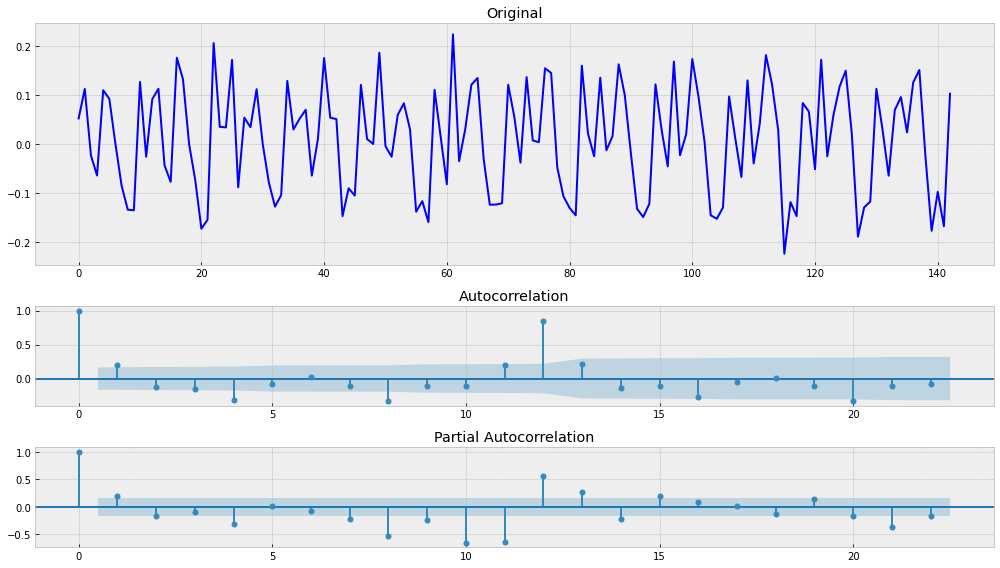

In [18]:
tsplot(series)

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее

In [19]:
series = series[12:] - series[:-12]
#Заглушаем сезонность 
#Дифференцируем только уже с 12 до последного и вычитаем от первого до не считая 12 последних

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


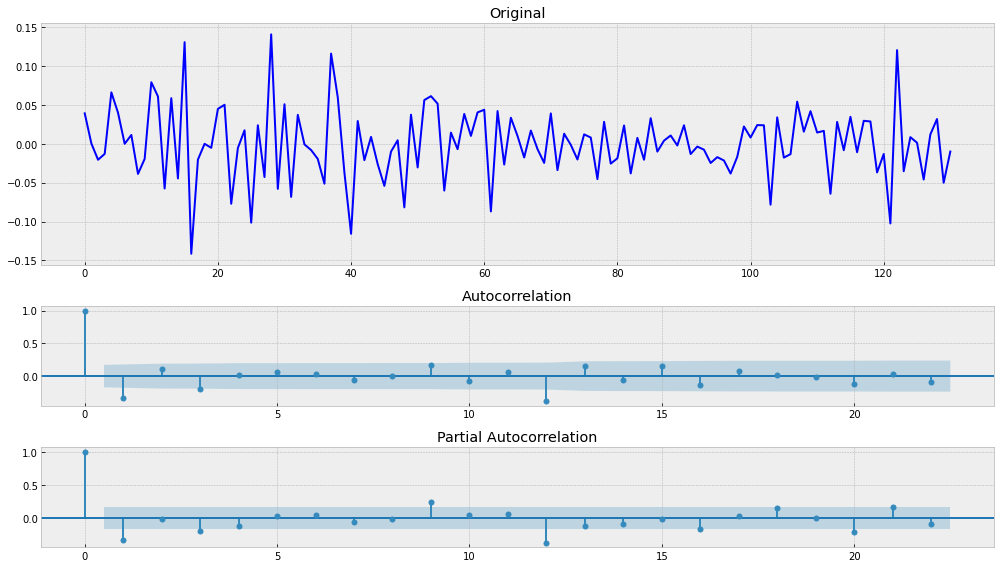

In [20]:
tsplot(series)
# теперь ряд стационарный
#значение пи велью меньше 5%
#и автокорреляции нет (одна пика только)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!